In [1]:
import dask_image.imread
import dask_image.ndfourier
import zarr
import matplotlib.pyplot as plt
from openslide import OpenSlide
import numpy as np

In [2]:
slide = OpenSlide('/Users/swang/Python/dask/dask images/tumor_001.tif')

In [10]:
# New Code to break sections
from numcodecs import Blosc
compressor = Blosc(cname='zstd', clevel=8, shuffle=Blosc.BITSHUFFLE)

max_y = slide.level_dimensions[3][0]
max_x = slide.level_dimensions[3][1]

In [11]:
slide.level_dimensions

((97792, 221184),
 (48896, 110592),
 (24448, 55296),
 (12224, 27648),
 (6112, 13824),
 (3056, 6912),
 (1528, 3456),
 (764, 1728),
 (382, 864),
 (191, 432))

In [12]:
max_y

12224

In [13]:
type(max_y)

int

In [14]:
layer = slide.read_region([0, 0], 3, [max_x, int(max_y/64)])
np_array = np.asarray(layer)
zarray = zarr.array(np_array, chunks=(max_y/64, max_x, 4), compressor=compressor)
zarray.info

Type,zarr.core.Array
Data type,uint8
Shape,"(191, 27648, 4)"
Chunk shape,"(191, 27648, 4)"
Order,C
Read-only,False
Compressor,"Blosc(cname='zstd', clevel=8, shuffle=BITSHUFFLE, blocksize=0)"
Store type,builtins.dict
No. bytes,21123072 (20.1M)
No. bytes stored,1003779 (980.3K)
Storage ratio,21.0


In [15]:
for i in range(1, 64):
    print(max_y*i/64)
    a = int(max_y*i/64)
    b = int(max_y/64)
    layer = slide.read_region([a, 0], 3, [max_x, b])
    np_array = np.asarray(layer)
    print(np_array.shape)
    

    z1 = zarr.array(np_array, chunks=(max_y/64, max_x, 4), compressor=compressor)
    #print(z1.info)
    zarray.append(z1)

191.0
(191, 27648, 4)
382.0
(191, 27648, 4)
573.0
(191, 27648, 4)
764.0
(191, 27648, 4)
955.0
(191, 27648, 4)
1146.0
(191, 27648, 4)
1337.0
(191, 27648, 4)
1528.0
(191, 27648, 4)
1719.0
(191, 27648, 4)
1910.0
(191, 27648, 4)
2101.0
(191, 27648, 4)
2292.0
(191, 27648, 4)
2483.0
(191, 27648, 4)
2674.0
(191, 27648, 4)
2865.0
(191, 27648, 4)
3056.0
(191, 27648, 4)
3247.0
(191, 27648, 4)
3438.0
(191, 27648, 4)
3629.0
(191, 27648, 4)
3820.0
(191, 27648, 4)
4011.0
(191, 27648, 4)
4202.0
(191, 27648, 4)
4393.0
(191, 27648, 4)
4584.0
(191, 27648, 4)
4775.0
(191, 27648, 4)
4966.0
(191, 27648, 4)
5157.0
(191, 27648, 4)
5348.0
(191, 27648, 4)
5539.0
(191, 27648, 4)
5730.0
(191, 27648, 4)
5921.0
(191, 27648, 4)
6112.0
(191, 27648, 4)
6303.0
(191, 27648, 4)
6494.0
(191, 27648, 4)
6685.0
(191, 27648, 4)
6876.0
(191, 27648, 4)
7067.0
(191, 27648, 4)
7258.0
(191, 27648, 4)
7449.0
(191, 27648, 4)
7640.0
(191, 27648, 4)
7831.0
(191, 27648, 4)
8022.0
(191, 27648, 4)
8213.0
(191, 27648, 4)
8404.0
(191, 276

In [21]:
max_x

27648

In [23]:
a

12033

In [16]:
zarray.info

Type,zarr.core.Array
Data type,uint8
Shape,"(12224, 27648, 4)"
Chunk shape,"(191, 27648, 4)"
Order,C
Read-only,False
Compressor,"Blosc(cname='zstd', clevel=8, shuffle=BITSHUFFLE, blocksize=0)"
Store type,builtins.dict
No. bytes,1351876608 (1.3G)
No. bytes stored,13067938 (12.5M)
Storage ratio,103.4


In [17]:
storage_path = '/Users/swang/Python/dask/dask zarr files/imgtestlayer3'
zarr.convenience.save(storage_path, zarray)

In [24]:
import dask.array as da
image3 = da.from_zarr(storage_path, chunks=(191, 27648, 4))

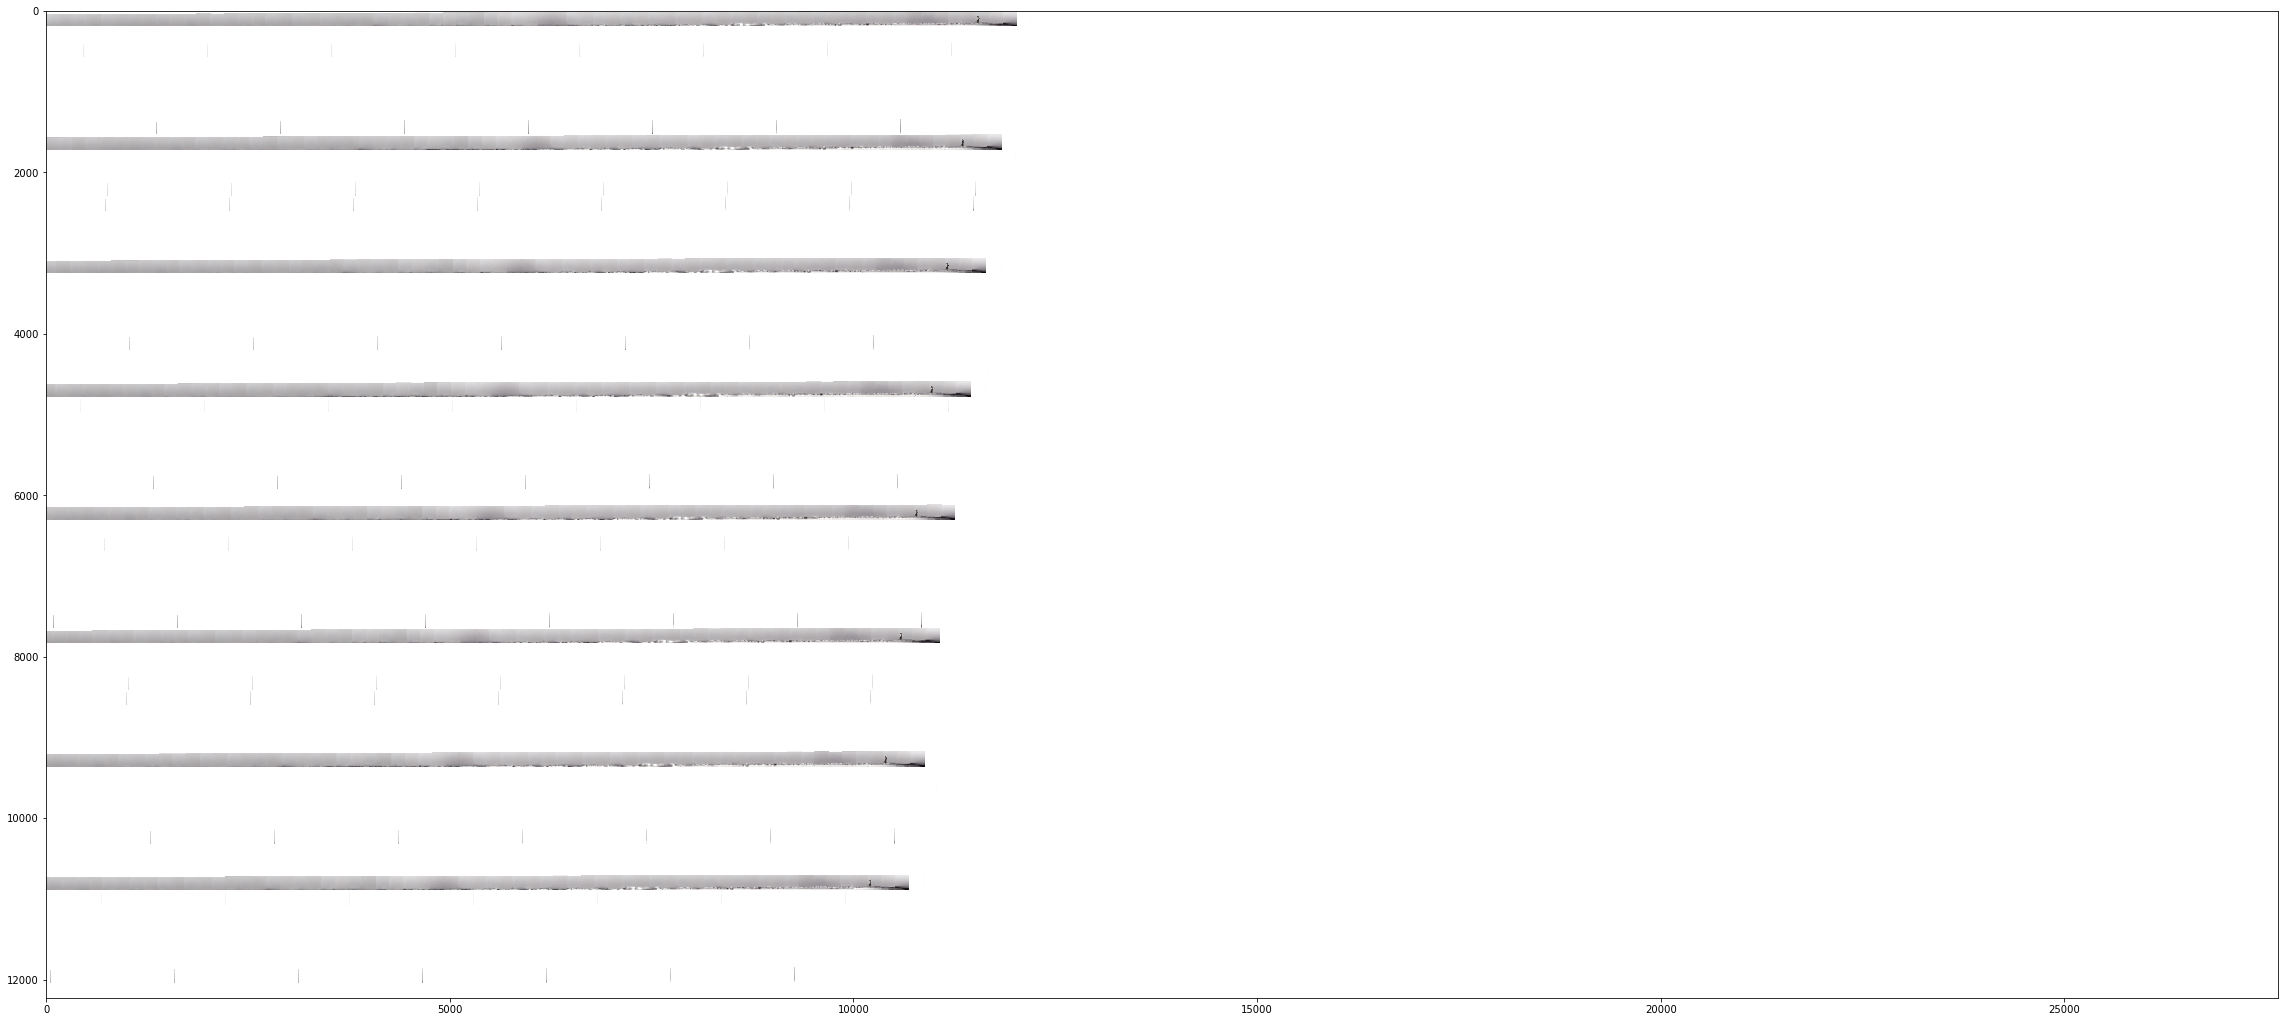

In [25]:
plt.figure(figsize=(40, 30))
plt.imshow(image3)
plt.show()